In [ ]:
!pip install fastai==1.0.52
from fastai import *
from fastai.text import *

## Preparing the data

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
path = Path(os.getcwd())
path = path/'gdrive'/'My Drive'
news=path/'Thesis Data'/'full doc csv'
aa=path/'Thesis Data'/'Our dataset'
aa2=path/'Thesis Data'/'AA dataset'
wiki=path/'Thesis Data'/'wiki_data'/'Wiki'
subsets = aa/'subsets'

In [0]:
bs=32

In [0]:
data_lm = load_data(wiki, 'wiki_word.pkl' ,bs=bs)

In [0]:
def testing(dts):
  df = pd.read_csv(dts) 
  text_array = df["text"].tolist()
  print(len(text_array))

  final_preds = []

  for text in text_array:
      preds = learn_cls.predict(text)
      final_preds.append(str(preds[0]))

  targets = df["label"].tolist()

  err=[]
  count =0;
  tst = len(text_array)

  for i in range(tst):
      if(targets[i]==final_preds[i]):
          count = count+1
      else:
  #         print(targets[i] + ", " + final_preds[i] + ';')
          err.append((targets[i],final_preds[i]))
  print("Accuracy: ")
  print(count/tst)
  print(err)
  return final_preds,targets

## 6 Authors

### LM tuning

In [0]:
# Language model data AA
data_lm_AA = TextLMDataBunch.from_csv(subsets, '6train.csv', vocab=data_lm.train_ds.vocab, bs=bs)
data_lm_AA.save('6train_data_lm_wiki.pkl')

In [0]:
data_lm_AA=load_data(subsets,'6train_data_lm_wiki.pkl',bs=bs)

In [0]:
learn = language_model_learner(data_lm_AA, AWD_LSTM, pretrained=False, drop_mult=0.5)

In [0]:
learn.load(wiki/'models'/'wiki_word_lm_30');

In [0]:
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


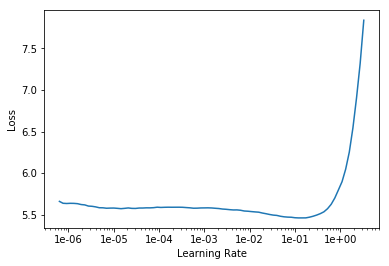

In [0]:
learn.lr_find()
learn.recorder.plot()

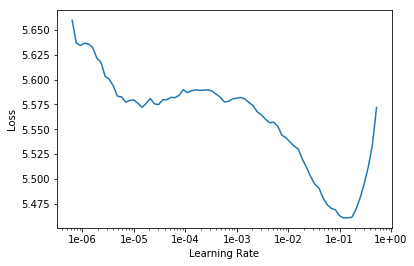

In [0]:
learn.recorder.plot(skip_end=15)

In [0]:
learn.freeze()
learn.fit_one_cycle(2, 1e-2)
learn.save('6train_wiki_lm_head');
learn.freeze_to(-2)
learn.fit_one_cycle(2, 1e-2)
learn.save('6train_wiki_lm_body_1');
learn.freeze_to(-3)
learn.fit_one_cycle(2, 1e-2)
learn.save('6train_wiki_lm_body_2');

epoch,train_loss,valid_loss,accuracy,time
0,4.693342,4.618749,0.287102,07:47
1,4.521294,4.491106,0.294660,07:55


epoch,train_loss,valid_loss,accuracy,time
0,4.513679,4.489434,0.299679,08:01
1,4.284081,4.321071,0.311134,08:01


epoch,train_loss,valid_loss,accuracy,time
0,4.423747,4.432250,0.303792,08:22
1,4.154693,4.253169,0.316986,08:23


In [0]:
learn.unfreeze()
learn.fit_one_cycle(4, 1e-3)
learn.save('6train_wiki_lm_body_4'); #mistakely 4 ran before 3

epoch,train_loss,valid_loss,accuracy,time
0,4.028521,4.241046,0.317460,08:45
1,4.011321,4.214762,0.319345,08:45
2,3.938411,4.202052,0.320705,08:45
3,3.849516,4.205823,0.320362,08:45


In [0]:
learn.unfreeze()
learn.fit_one_cycle(4, 1e-3)
learn.save('6train_wiki_lm_body_3');

epoch,train_loss,valid_loss,accuracy,time
0,3.886607,4.210766,0.320044,08:45
1,3.928466,4.197102,0.320839,08:45
2,3.808330,4.197872,0.321079,08:45
3,3.735327,4.203638,0.320700,08:45


In [0]:
learn.save_encoder('6train_wiki_lm_enc')

### Classifier

Now, we'll create a new data object that only grabs the labelled data and keeps those labels. Again, this line takes a bit of time.

In [0]:
data_clas = TextClasDataBunch.from_csv(subsets, '6train.csv', vocab=data_lm.train_ds.vocab, bs=bs)
data_clas.save('6train_data_clas_wiki.pkl')

In [0]:
data_clas.show_batch()

text,target
"xxbos ছিল , xxunk পার হবার আগেই ওর xxunk হবে এবং সে xxunk ফিরে আসবে । আমাকে জোর xxunk কিছু করতে হবে না । কিন্তু সে xxunk xxunk না । আপনি এই চিঠি xxunk এমন ব্যবস্থা করবেন যেন সে xxunk ফিরে আসে । আমি একটি ব্যাপার খুব পরিষ্কার করে আপনাকে জানাতে চাই , তা হল — ও বোকা হোক , যা হোক , ওকে আমি অসম্ভব ভালবাসি । ভালবাসা মাপার",humayun_ahmed
"xxbos মাত্র xxunk , এর xxunk দোকান বন্ধ । আমি xxunk দিকে xxunk বললাম , ভাল আছেন ? সে সরু চোখে xxunk । কিছু বলল না । ‘ xxunk xxunk ? ’ ‘ উনার চাকরি চলে গেছে । উনি xxunk আমি জানি না । ’ ‘ চাকরি গেল কেন ? ’ ‘ জানি না । মালিক জানে । আপনে উনার কে হন ? ’ ‘ কেউ হই না । টেলিফোন",humayun_ahmed
"xxbos কও । ” “ xxunk xxunk আজ রাত্রে ডেকো না । ” “ কেন , মন খুলে আমি তো সবই xxunk xxunk । ও কি তাও xxunk না । ” “ xxunk xxunk । xxunk যে , মন তোমার খোলে নি । সুর xxunk না । ” “ কিছুতে বিশুদ্ধ হল না আমার মন ! এত মার xxunk ! কে বিশুদ্ধ করে দেবে । ওগো সন্ন্যাসী , আমাকে বাঁচাও",robindronath
xxbos ভাই xxunk শিখতে পারেননি । xxunk দিতে xxunk না । কিছু মনে করবেন না । আবদুর রশীদ xxunk আছে — আমি হাঁটা xxunk । মেসে ফিরে যাব । সারাদিন কিছু না xxunk xxunk xxunk পাক দিচ্ছে । মেসে রান্না xxunk কি - না খোঁজ নিতে হবে । xxunk ভাত সকাল সকাল নেমে xxunk । ভাত নেমে গেলে একটা ডিম ভেজে দিতে বলব । আগুন - গরম ভাত xxunk xxunk,humayun_ahmed
"xxbos খুবই ভাল লাগে ? ’ ‘ এইসব ভাল লাগার ব্যাপার ? তুই একটা xxunk xxunk … . ‘ আমি কোন xxunk xxunk মামা । ’ ‘ তোর xxunk একজন xxunk । ব্যাপার একই । ভাই xxunk , বন্ধু এদের না দেখলে দেখব কাকে ? xxunk xxunk দেখব ? ‘ মামা কিছু xxunk ? হোটেল সারারাত খোলা থাকে । xxunk যাই । ’ ‘ না কিছু xxunk না । ফজরের",humayun_ahmed


In [0]:
learn_cls = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5, pretrained=False)

In [0]:
learn_cls.load_encoder('6train_wiki_lm_enc')

In [0]:
learn_cls.freeze()

In [0]:
learn_cls.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


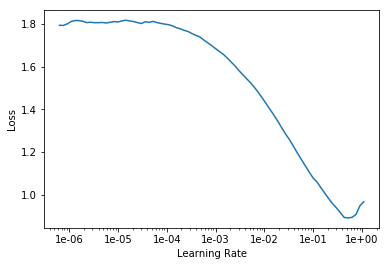

In [0]:
learn_cls.recorder.plot(skip_end=7)

In [0]:
learn_cls.fit_one_cycle(2, 1e-2, moms=(0.8,0.7))
learn_cls.save('6train_wiki_cls_1')
learn_cls.freeze_to(-2)
learn_cls.fit_one_cycle(2 , slice(1e-2/(2.8**4),1e-2), moms=(0.8,0.7))
learn_cls.save('6train_wiki_cls_2')
learn_cls.freeze_to(-3)
learn_cls.fit_one_cycle(2, slice(5e-3/(2.8**4),5e-3), moms=(0.8,0.7))
learn_cls.save('6train_wiki_cls_3')
learn_cls.unfreeze()
learn_cls.fit_one_cycle(4, slice(1e-3/(2.8**4),1e-3), moms=(0.8,0.7))
learn_cls.save('6train_wiki_cls_4')

epoch,train_loss,valid_loss,accuracy,time
0,0.138884,0.015325,0.997162,02:12
1,0.030022,0.009553,0.997162,02:13


epoch,train_loss,valid_loss,accuracy,time
0,0.038774,0.011146,0.997162,02:31
1,0.015651,0.004987,0.999054,02:29


epoch,train_loss,valid_loss,accuracy,time
0,0.018948,0.008216,0.998108,03:34
1,0.011122,0.007673,0.999054,03:31


epoch,train_loss,valid_loss,accuracy,time
0,0.007286,0.005990,0.998108,04:27
1,0.004108,0.002385,0.999054,04:29
2,0.002108,0.003092,0.999054,04:27
3,0.002024,0.002639,0.999054,04:28


### Testing

In [0]:
pred,targ = testing(subsets/"6test.csv")

1320
Accuracy: 
0.9962121212121212
[('MZI', 'humayun_ahmed'), ('humayun_ahmed', 'MZI'), ('humayun_ahmed', 'shorotchandra'), ('humayun_ahmed', 'MZI'), ('shomresh', 'robindronath')]


In [0]:
from sklearn.metrics import f1_score
out  = f1_score(targ, pred, average=None) #'macro' , also == weighted cuz dataset is balanced
out , out.mean()

(array([0.993197, 0.990868, 0.997732, 0.997722, 0.997732, 1.      ]),
 0.9962086345166553)

## 8 Authors

### LM tuning

In [0]:
# Language model data AA
data_lm_AA = TextLMDataBunch.from_csv(subsets, '8train.csv', vocab=data_lm.train_ds.vocab, bs=bs)
data_lm_AA.save('8train_data_lm_wiki.pkl')

In [0]:
data_lm_AA=load_data(subsets,'8train_data_lm_wiki.pkl',bs=bs)

In [0]:
learn = language_model_learner(data_lm_AA, AWD_LSTM, pretrained=False, drop_mult=0.5)

In [0]:
learn.load(wiki/'models'/'wiki_word_lm_30');

In [0]:
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


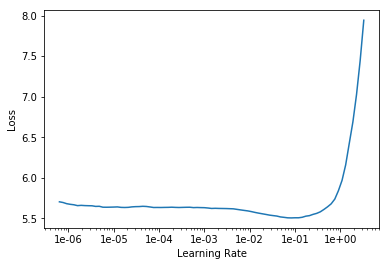

In [0]:
learn.lr_find()
learn.recorder.plot()

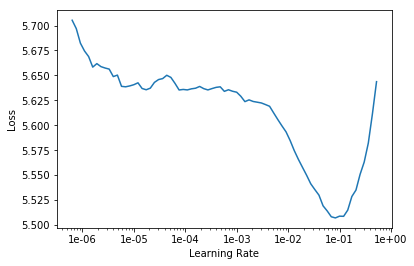

In [0]:
learn.recorder.plot(skip_end=15)

In [0]:
learn.freeze()
learn.fit_one_cycle(2, 1e-2)
learn.save('8train_wiki_lm_head');
learn.freeze_to(-2)
learn.fit_one_cycle(2, 1e-2)
learn.save('8train_wiki_lm_body_1');
learn.freeze_to(-3)
learn.fit_one_cycle(2, 1e-2)
learn.save('8train_wiki_lm_body_2');

epoch,train_loss,valid_loss,accuracy,time
0,4.767251,4.702615,0.282086,08:52
1,4.595047,4.573579,0.289469,08:56


epoch,train_loss,valid_loss,accuracy,time
0,4.603080,4.570371,0.293562,09:03
1,4.391335,4.408120,0.304815,09:03


epoch,train_loss,valid_loss,accuracy,time
0,4.548553,4.518783,0.297217,09:29
1,4.284061,4.337086,0.310423,09:27


okay this is running

In [0]:
learn.unfreeze()
learn.fit_one_cycle(4, 1e-3)
learn.save('8train_wiki_lm_body_4'); #mistakely 4 ran before 3 #mistakely copied the same mistake -_-

epoch,train_loss,valid_loss,accuracy,time
0,4.167002,4.323343,0.310823,09:53
1,4.081696,4.295747,0.312980,09:53
2,4.046117,4.282713,0.314328,09:54
3,3.996463,4.285848,0.313770,09:52


In [0]:
learn.unfreeze()
learn.fit_one_cycle(4, 1e-3)
learn.save('8train_wiki_lm_body_3');

epoch,train_loss,valid_loss,accuracy,time
0,4.017407,4.289841,0.313534,09:51
1,3.973795,4.279354,0.314457,09:52
2,3.940337,4.274124,0.314732,09:52
3,3.848219,4.280333,0.314377,09:52


In [0]:
learn.save_encoder('8train_wiki_lm_enc')

### Classifier

Now, we'll create a new data object that only grabs the labelled data and keeps those labels. Again, this line takes a bit of time.

In [0]:
data_clas = TextClasDataBunch.from_csv(subsets, '8train.csv', vocab=data_lm.train_ds.vocab, bs=bs)
data_clas.save('8train_data_clas_wiki.pkl')

In [0]:
data_clas.show_batch()

text,target
"xxbos xxunk । তার ভারি নিঃশ্বাস xxunk । xxunk xxunk বোধ xxunk । xxunk নারকেল গাছের xxunk xxunk । মানুষের মতোই লাগছে xxunk । বাতাসে গাছের পাতা xxunk । মনে হচ্ছে মানুষটি হাত xxunk । ঘরের ভেতর মিষ্টি একটা গন্ধ । মিষ্টি , কিন্তু অচেনা । আনিস xxunk কাছে টেনে xxunk । xxunk মুখে আলো এসে xxunk । কী যে xxunk লাগছে ! আনিস ছোট্ট করে নিঃশ্বাস ফেলল । ওদের",humayun_ahmed
"xxbos উঠল , হাতে কিল xxunk বলল , “ ফ্যান্টাস্টিক ! ” এবারে আমরা xxunk গেলাম । আমি xxunk xxunk বললাম , “ ফ্যান্টাস্টিক ? ” “ হ্যাঁ । আমি সব xxunk এরকম একটা স্কুলে xxunk xxunk যেখানে স্যার xxunk উৎপাত করবে না । আমরা নিজেরা নিজেরা xxunk xxunk করব । ” বগা বলল , “ xxunk xxunk ? কোনোদিন কোনো xxunk xxunk xxunk করে ? বেত xxunk না xxunk",MZI
"xxbos তোমার কাছেই xxunk , নালিশ আছে । ” “ কিসের নালিশ ? ” “ একটু xxunk , দুঃখের কথা বলি । ” xxunk উপর xxunk xxunk । নবীন বললে , “ xxunk অত্যাচার ! এই xxunk আমার বই রেখেছেন xxunk । ” “ এমন শাসন কেন ? ” “ ঈর্ষা – যেহেতু নিজে ইংরেজি xxunk পারেন না । আমি xxunk পক্ষে , কিন্তু উনি স্বামী - জাতির xxunk বিরোধী",robindronath
"xxbos xxunk বরাবর xxunk । চিরকাল মা - xxunk আদর xxunk ও যদি কোনো কাজ নিজের হাতে করিতে পারে । ” এই xxunk মাতা xxunk কর্মে xxunk xxunk প্রতি xxunk করিলেন । কেমন xxunk এই xxunk একান্ত xxunk xxunk xxunk সর্বপ্রকার xxunk xxunk xxunk , xxunk সহিত xxunk সেই একমাত্র পরামর্শ । এই xxunk xxunk প্রতি নির্ভর xxunk তিনি নিতান্ত নিশ্চিন্ত , পরম সুখী । সম্প্রতি xxunk মর্যাদা যে মহেন্দ্র",robindronath
"xxbos না , রাগ প্রকাশ xxunk xxunk । যতটুকু xxunk মর্যাদা রক্ষা xxunk xxunk কখনো xxunk না এবং xxunk করে না । চুল xxunk - পরিমাণে xxunk , যত্ন না করলেও এলোমেলো হবার আশঙ্কা নেই । মুখের রঙ বাদামি , লালের আভাস xxunk । xxunk উপর দুইপাশে প্রশস্ত টানা কপাল , দৃষ্টিতে কঠিন বুদ্ধির xxunk , ঠোঁটে xxunk সংকল্প এবং xxunk গৌরব । অত্যন্ত দুঃসাধ্য রকমের দাবি সে xxunk করতে",robindronath


In [0]:
learn_cls = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5, pretrained=False)

In [0]:
learn_cls.load_encoder('8train_wiki_lm_enc')

In [0]:
learn_cls.freeze()

In [0]:
learn_cls.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


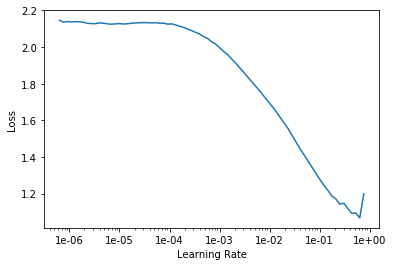

In [0]:
learn_cls.recorder.plot(skip_end=7)

In [0]:
learn_cls.fit_one_cycle(2, 1e-2, moms=(0.8,0.7))
learn_cls.save('8train_wiki_cls_1')
learn_cls.freeze_to(-2)
learn_cls.fit_one_cycle(2 , slice(1e-2/(2.8**4),1e-2), moms=(0.8,0.7))
learn_cls.save('8train_wiki_cls_2')
learn_cls.freeze_to(-3)
learn_cls.fit_one_cycle(2, slice(5e-3/(2.8**4),5e-3), moms=(0.8,0.7))
learn_cls.save('8train_wiki_cls_3')
learn_cls.unfreeze()
learn_cls.fit_one_cycle(4, slice(1e-3/(2.8**4),1e-3), moms=(0.8,0.7))
learn_cls.save('8train_wiki_cls_4')

epoch,train_loss,valid_loss,accuracy,time
0,0.123857,0.004658,0.998321,02:30
1,0.025019,0.004549,0.998321,02:31


epoch,train_loss,valid_loss,accuracy,time
0,0.045589,0.011920,0.998321,02:50
1,0.013670,0.004363,0.998321,02:50


epoch,train_loss,valid_loss,accuracy,time
0,0.014550,0.012630,0.996641,04:02
1,0.009465,0.001409,1.000000,04:00


epoch,train_loss,valid_loss,accuracy,time
0,0.005024,0.003697,0.997481,05:01
1,0.003654,0.003613,0.997481,05:04
2,0.003963,0.003548,0.998321,05:01
3,0.002824,0.004508,0.998321,05:04


### Testing

In [0]:
pred,targ = testing(subsets/"8test.csv")

1496
Accuracy: 
0.9959893048128342
[('toslima_nasrin', 'shunil_gongopaddhay'), ('MZI', 'humayun_ahmed'), ('MZI', 'humayun_ahmed'), ('robindronath', 'shunil_gongopaddhay'), ('humayun_ahmed', 'shorotchandra'), ('humayun_ahmed', 'MZI')]


In [0]:
from sklearn.metrics import f1_score
out  = f1_score(targ, pred, average=None) #'macro' , also == weighted cuz dataset is balanced
out , out.mean()

(array([0.991957, 0.989305, 0.997319, 1.      , 1.      , 0.997333, 0.994681, 0.997319]),
 0.9959892714367653)

## 10 Authors

### LM tuning

In [0]:
# Language model data AA
data_lm_AA = TextLMDataBunch.from_csv(subsets, '10train.csv', vocab=data_lm.train_ds.vocab, bs=bs)
data_lm_AA.save('10train_data_lm_wiki.pkl')

In [0]:
data_lm_AA=load_data(subsets,'10train_data_lm_wiki.pkl',bs=bs)

In [0]:
learn = language_model_learner(data_lm_AA, AWD_LSTM, pretrained=False, drop_mult=0.5)

In [0]:
learn.load(wiki/'models'/'wiki_word_lm_30');

In [0]:
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


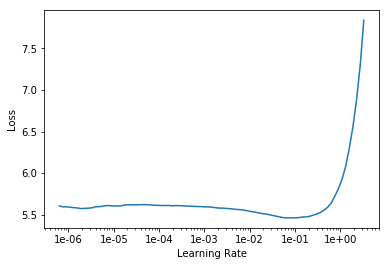

In [0]:
learn.lr_find()
learn.recorder.plot()

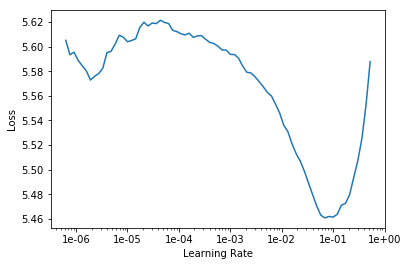

In [0]:
learn.recorder.plot(skip_end=15)

In [0]:
learn.freeze()
learn.fit_one_cycle(2, 1e-2)
learn.save('10train_wiki_lm_head');
learn.freeze_to(-2)
learn.fit_one_cycle(2, 1e-2)
learn.save('10train_wiki_lm_body_1');
learn.freeze_to(-3)
learn.fit_one_cycle(2, 1e-2)
learn.save('10train_wiki_lm_body_2');

epoch,train_loss,valid_loss,accuracy,time
0,4.793038,4.718000,0.283351,19:04
1,4.609278,4.586215,0.290177,19:04


epoch,train_loss,valid_loss,accuracy,time
0,4.601068,4.583961,0.295012,19:23
1,4.392578,4.414185,0.306398,19:21


epoch,train_loss,valid_loss,accuracy,time
0,4.556533,4.532558,0.299726,20:14
1,4.331052,4.342235,0.312570,20:14


In [0]:
learn.unfreeze()
learn.fit_one_cycle(4, 1e-3)
learn.save('10train_wiki_lm_body_3');

epoch,train_loss,valid_loss,accuracy,time
0,4.154052,4.325961,0.313524,21:07
1,4.144258,4.297837,0.315467,21:07
2,4.031370,4.281765,0.316788,21:09
3,3.992074,4.282953,0.316502,21:08


In [0]:
learn.unfreeze()
learn.fit_one_cycle(4, 1e-3)
learn.save('10train_wiki_lm_body_4');

epoch,train_loss,valid_loss,accuracy,time
0,3.980323,4.287921,0.316352,21:09
1,4.066355,4.277338,0.316746,21:09
2,3.954869,4.268483,0.317390,21:09
3,3.852179,4.272539,0.317336,21:08


In [0]:
learn.save_encoder('10train_wiki_lm_enc')

### Classifier

Now, we'll create a new data object that only grabs the labelled data and keeps those labels. Again, this line takes a bit of time.

In [0]:
data_clas = TextClasDataBunch.from_csv(subsets, '10train.csv', vocab=data_lm.train_ds.vocab, bs=bs)
data_clas.save('10train_data_clas_wiki.pkl')

In [0]:
data_clas=load_data(subsets,'10train_data_clas_wiki.pkl',bs=bs)

In [0]:
data_clas.show_batch()

text,target
"xxbos তাদের মধ্যে কেউ তাকে খুন করেছে ? ’ ‘ কলকাতার xxunk যাদের নাম আছে তাদের xxunk করলে xxunk আন্দাজ করা xxunk , এবার তিন নম্বর xxunk সঙ্গে দেখা করা যাক । ’ ‘ xxunk । ’ তিন নম্বর ঘরে xxunk সান্যাল xxunk xxunk হয়ে শুয়ে xxunk , xxunk শুনে xxunk তুললেন । xxunk , ‘ কে ? ’ xxunk সংক্ষেপে xxunk , ‘ পুলিস । ’ xxunk উঠে xxunk",shordindu
"xxbos হচ্ছে । আগে তো এরকম কখনো xxunk নি ! মিসির আলি - টালি xxunk , xxunk কোনো xxunk দেখানো দরকার । xxunk করে শব্দ হচ্ছে রান্না ঘরে । ইঁদুরের উপদ্রব । তবু কেন জানি শব্দটা অন্য রকম মনে হচ্ছে । যেন কেউ xxunk রান্নাঘরে । xxunk শব্দও হলো xxunk বার । আনিস বলল , ‘ কে ? ’ রান্নাঘরের শব্দটা হঠাৎ থেমে গেল । আনিস বলল , ‘ কে",humayun_ahmed
"xxbos নেই । তবে – ’ xxunk xxunk xxunk গেল । ব্যোমকেশ প্রশ্ন xxunk , ‘ তবে কি ? ’ xxunk সিগারেট xxunk xxunk , বাকি অর্ধেক xxunk সে সযত্নে পকেটে xxunk , xxunk , ‘ xxunk xxunk এক টিন পেট্রোল রাখা xxunk , দেখা গেল টিন খালি । ’ ‘ তার মানে — ’ ব্যোমকেশ কথা অসমাপ্ত xxunk চিন্তার মধ্যে xxunk গেল । xxunk xxunk xxunk , xxunk ,",shordindu
xxbos xxunk রাখার xxunk প্রথম পাঠ । আমাদের মেসে সকালবেলা চা xxunk না । চা খেতে রাস্তার xxunk xxunk যেতে xxunk । সেই xxunk পৃথিবীর সবচে ’ মিষ্টি এবং একই সঙ্গে পৃথিবীর সবচে ’ গরম চা xxunk xxunk । এই চা প্রথম দু ’ দিন খেতে খারাপ লাগে । কিন্তু xxunk দিন থেকে নেশা ধরে xxunk । ঘুম থেকে xxunk xxunk কাপ চা খেতে ইচ্ছা করে । xxunk পা xxunk,humayun_ahmed
"xxbos ‘ কি হল xxunk ধরে ? ’ ব্যোমকেশ xxunk হাস্য xxunk xxunk , ‘ xxunk , xxunk যা xxunk ? ’ xxunk xxunk xxunk , ‘ কথা চাপা দিও না । পাঁচ ঘণ্টা ধরে কি কথা হল ? ’ ব্যোমকেশ জিভ xxunk , ‘ পুলিসের xxunk কি বলতে আছে ? তবে এমন কোনও কথা xxunk যা তুমি জান না । ’ ‘ হত্যাকারী কে ? ’ ‘ xxunk দে",shordindu


In [0]:
learn_cls = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5, pretrained=False)

In [0]:
learn_cls.load_encoder('10train_wiki_lm_enc')

In [0]:
learn_cls.freeze()

In [0]:
learn_cls.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


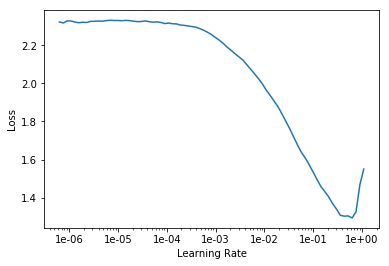

In [0]:
learn_cls.recorder.plot(skip_end=7)

In [0]:
learn_cls.fit_one_cycle(2, 1e-2, moms=(0.8,0.7))
learn_cls.save('10train_wiki_cls_1')
learn_cls.freeze_to(-2)
learn_cls.fit_one_cycle(2 , slice(1e-2/(2.8**4),1e-2), moms=(0.8,0.7))
learn_cls.save('10train_wiki_cls_2')
learn_cls.freeze_to(-3)
learn_cls.fit_one_cycle(2, slice(5e-3/(2.8**4),5e-3), moms=(0.8,0.7))
learn_cls.save('10train_wiki_cls_3')
learn_cls.unfreeze()
learn_cls.fit_one_cycle(4, slice(1e-3/(2.8**4),1e-3), moms=(0.8,0.7))
learn_cls.save('10train_wiki_cls_4')

epoch,train_loss,valid_loss,accuracy,time
0,0.146309,0.013042,0.996321,05:00
1,0.034273,0.015044,0.997057,04:58


epoch,train_loss,valid_loss,accuracy,time
0,0.063191,0.010963,0.994849,05:47
1,0.014264,0.010075,0.996321,05:52


epoch,train_loss,valid_loss,accuracy,time
0,0.015582,0.015265,0.996321,08:42
1,0.008603,0.006090,0.997792,08:37


epoch,train_loss,valid_loss,accuracy,time


In [0]:
learn_cls.load('10train_wiki_cls_3')
learn_cls.unfreeze()
learn_cls.fit_one_cycle(4, slice(1e-3/(2.8**4),1e-3), moms=(0.8,0.7))
learn_cls.save('10train_wiki_cls_4')

epoch,train_loss,valid_loss,accuracy,time
0,0.009126,0.006598,0.997792,10:46
1,0.007444,0.008006,0.997792,10:50
2,0.004202,0.006529,0.999264,10:54
3,0.004363,0.006427,0.999264,10:50


#### Testing

In [0]:
pred,targ = testing(subsets/"10test.csv")

1700
Accuracy: 
0.9970588235294118
[('shordindu', 'shunil_gongopaddhay'), ('shordindu', 'robindronath'), ('MZI', 'humayun_ahmed'), ('humayun_ahmed', 'MZI'), ('humayun_ahmed', 'MZI')]


In [0]:
from sklearn.metrics import f1_score
out  = f1_score(targ, pred, average=None) #'macro' , also == weighted cuz dataset is balanced
out , out.mean()

(array([0.991202, 0.99115 , 0.997067, 1.      , 1.      , 0.994083, 1.      , 1.      , 0.997067, 1.      ]),
 0.9970570526116322)

## 12 Authors

### LM tuning

In [0]:
# Language model data AA
data_lm_AA = TextLMDataBunch.from_csv(subsets, '12train.csv', vocab=data_lm.train_ds.vocab, bs=bs)
data_lm_AA.save('12train_data_lm_wiki.pkl')

In [0]:
data_lm_AA=load_data(subsets,'12train_data_lm_wiki.pkl',bs=bs)

In [0]:
learn = language_model_learner(data_lm_AA, AWD_LSTM, pretrained=False, drop_mult=0.5)

In [0]:
learn.load(wiki/'models'/'wiki_word_lm_30');

In [0]:
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


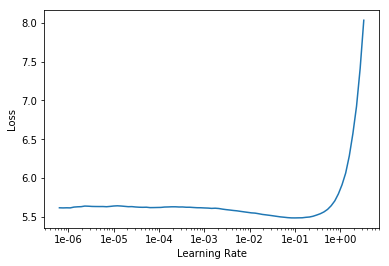

In [0]:
learn.lr_find()
learn.recorder.plot()

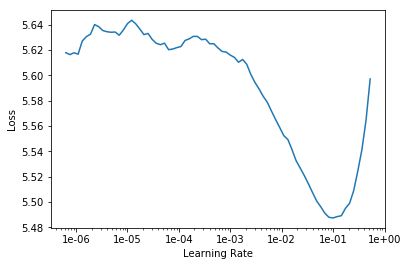

In [0]:
learn.recorder.plot(skip_end=15)

In [0]:
learn.freeze()
learn.fit_one_cycle(2, 1e-2)
learn.save('12train_wiki_lm_head');
learn.freeze_to(-2)
learn.fit_one_cycle(2, 1e-2)
learn.save('12train_wiki_lm_body_1');
learn.freeze_to(-3)
learn.fit_one_cycle(2, 1e-2)
learn.save('12train_wiki_lm_body_2');

epoch,train_loss,valid_loss,accuracy,time
0,4.793042,4.711890,0.290782,14:42
1,4.552779,4.588085,0.297231,14:41


epoch,train_loss,valid_loss,accuracy,time
0,4.548854,4.594985,0.300416,14:57
1,4.381627,4.436309,0.311224,14:55


epoch,train_loss,valid_loss,accuracy,time
0,4.550563,4.554372,0.304061,15:50
1,4.318315,4.371192,0.316445,15:47


In [0]:
learn.unfreeze()
learn.fit_one_cycle(4, 1e-3)
learn.save('12train_wiki_lm_body_3');

epoch,train_loss,valid_loss,accuracy,time
0,4.114634,4.362712,0.316821,16:19
1,4.138265,4.331767,0.318709,16:19
2,4.043723,4.321959,0.319587,16:21
3,3.952391,4.325200,0.319370,16:19


In [0]:
learn.unfreeze()
learn.fit_one_cycle(4, 1e-3)
learn.save('12train_wiki_lm_body_4');

epoch,train_loss,valid_loss,accuracy,time
0,4.005393,4.326457,0.319328,16:20
1,4.029383,4.317846,0.319606,16:18
2,3.933014,4.315534,0.319959,16:10
3,3.830733,4.323819,0.319178,16:07


In [0]:
learn.save_encoder('12train_wiki_lm_enc')

### Classifier

In [0]:
data_clas = TextClasDataBunch.from_csv(subsets, '12train.csv', vocab=data_lm.train_ds.vocab, bs=bs)
data_clas.save('12train_data_clas_wiki.pkl')

In [0]:
data_clas=load_data(subsets,'12train_data_clas_wiki.pkl',bs=bs)

In [0]:
data_clas.show_batch()

text,target
"xxbos বুঝি কোনো xxunk নেই ? ’ ‘ xxunk আমি খুব সুখী । ’ রানু হাসতে লাগল । নীলু হঠাৎ গম্ভীর xxunk বলল , ‘ তুমি xxunk , একটা খুব xxunk কথা আমাকে বলবে । ’ ‘ xxunk নাকি ? ’ ‘ হ্যাঁ । আজ সেটা বলতে হবে । তারপর আমি আমার একটা xxunk কথা বলব । ’ রানু হাসতে লাগল । ‘ xxunk কেন রানু ? ’ ‘ তোমার",humayun_ahmed
"xxbos xxunk । xxunk , xxunk , পরস্পরকে অবিশ্বাস , ক্ষমতালাভের চক্রান্ত , গুপ্তচরবৃত্তি একদিন তাদের টেনে xxunk যাবে xxunk xxunk । এ আমি স্পষ্ট দেখতে পাচ্ছি । এই xxunk ভিতরকার xxunk xxunk মধ্যে দিনরাত xxunk বিষাক্ত xxunk কখনোই নিজের স্বভাবে সেই xxunk রক্ষা করতে পারব না যাতে পৃথিবীতে কোনো xxunk কাজ করতে পারা xxunk । ” “ xxunk xxunk , তুমি যাকে xxunk বল সে কি xxunk দেশে ?",robindronath
"xxbos বাজার xxunk সাধ xxunk না - তবে xxunk উপর রাগ ছিল xxunk একবার xxunk দেখিতে xxunk - xxunk প্রথমেই xxunk যে , সেখানে খোদ কমলাকান্ত xxunk নামে xxunk - xxunk পচা xxunk xxunk xxunk xxunk আছে - আপনি ঘোল xxunk , এবং xxunk xxunk । তখন চমক হইল - চক্ষু xxunk - xxunk , xxunk বাবুর xxunk আছি । xxunk xxunk কাছে আছে বটে । প্রসন্ন এক xxunk ঘোল",bongkim
"xxbos নগেন্দ্র ? আমি কে ? xxunk নগেন্দ্র । কতই নাম xxunk – xxunk কি ? xxunk xxunk সঙ্গে xxunk না xxunk যদি আমার – সঙ্গে হতো – দূর হউক – xxunk xxunk । xxunk , যেন এখন xxunk – কাল ভেসে xxunk – তবে সবাই xxunk , শুনে নগেন্দ্র – নগেন্দ্র ! – নগেন্দ্র ! – নগেন্দ্র ! আবার বলি – নগেন্দ্র নগেন্দ্র নগেন্দ্র ! xxunk শুনে কি xxunk",bongkim
"xxbos কও । ” “ xxunk xxunk আজ রাত্রে ডেকো না । ” “ কেন , মন খুলে আমি তো সবই xxunk xxunk । ও কি তাও xxunk না । ” “ xxunk xxunk । xxunk যে , মন তোমার খোলে নি । সুর xxunk না । ” “ কিছুতে বিশুদ্ধ হল না আমার মন ! এত মার xxunk ! কে বিশুদ্ধ করে দেবে । ওগো সন্ন্যাসী , আমাকে বাঁচাও",robindronath


In [0]:
learn_cls = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5, pretrained=False)

In [0]:
learn_cls.load_encoder('12train_wiki_lm_enc')

In [0]:
learn_cls.freeze()

In [0]:
learn_cls.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


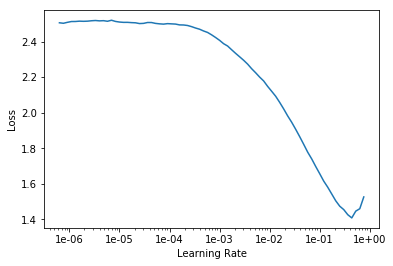

In [0]:
learn_cls.recorder.plot(skip_end=7)

In [0]:
learn_cls.fit_one_cycle(2, 1e-2, moms=(0.8,0.7))
learn_cls.save('12train_wiki_cls_1')
learn_cls.freeze_to(-2)
learn_cls.fit_one_cycle(2 , slice(1e-2/(2.8**4),1e-2), moms=(0.8,0.7))
learn_cls.save('12train_wiki_cls_2')
learn_cls.freeze_to(-3)
learn_cls.fit_one_cycle(2, slice(5e-3/(2.8**4),5e-3), moms=(0.8,0.7))
learn_cls.save('12train_wiki_cls_3')
learn_cls.unfreeze()
learn_cls.fit_one_cycle(4, slice(1e-3/(2.8**4),1e-3), moms=(0.8,0.7))
learn_cls.save('12train_wiki_cls_4')

epoch,train_loss,valid_loss,accuracy,time
0,0.260895,0.060835,0.985158,03:46
1,0.055956,0.042108,0.988868,03:49


epoch,train_loss,valid_loss,accuracy,time
0,0.069324,0.046246,0.990724,04:27
1,0.025476,0.037415,0.993506,04:27


epoch,train_loss,valid_loss,accuracy,time
0,0.020374,0.034645,0.992579,06:37
1,0.007074,0.025515,0.995362,06:37


epoch,train_loss,valid_loss,accuracy,time
0,0.004406,0.023915,0.997217,08:34
1,0.007372,0.023710,0.995362,08:29
2,0.007245,0.022241,0.996289,08:30
3,0.005730,0.021555,0.997217,08:35


In [0]:
learn_cls.load('12train_wiki_cls_3')
learn_cls.unfreeze()
learn_cls.fit_one_cycle(4, slice(1e-3/(2.8**4),1e-3), moms=(0.8,0.7))
learn_cls.save('12train_wiki_cls_4')

epoch,train_loss,valid_loss,accuracy,time
0,0.009813,0.025899,0.996289,08:32
1,0.006866,0.026060,0.995362,08:34
2,0.007191,0.025578,0.995362,08:27
3,0.004006,0.026893,0.996289,08:32


#### Testing

In [0]:
pred,targ = testing(subsets/"12test.csv")

1356
Accuracy: 
0.9948377581120944
[('tarashonkor', 'shunil_gongopaddhay'), ('shordindu', 'shottojit_roy'), ('MZI', 'humayun_ahmed'), ('MZI', 'humayun_ahmed'), ('MZI', 'humayun_ahmed'), ('robindronath', 'shordindu'), ('robindronath', 'tarashonkor')]


In [0]:
from sklearn.metrics import f1_score
out  = f1_score(targ, pred, average=None) #'macro' , also == weighted cuz dataset is balanced
out , out.mean()

(array([0.986547, 1.      , 0.9869  , 0.991071, 1.      , 1.      , 0.99115 , 1.      , 0.995595, 0.995595, 0.99115 ,
        1.      ]), 0.9948340324467105)

## 14 Authors

### LM tuning

In [0]:
# Language model data AA
data_lm_AA = TextLMDataBunch.from_csv(subsets, '14train.csv', vocab=data_lm.train_ds.vocab, bs=bs)
data_lm_AA.save('14train_data_lm_wiki.pkl')

In [0]:
data_lm_AA=load_data(subsets,'14train_data_lm_wiki.pkl',bs=bs)

In [0]:
learn = language_model_learner(data_lm_AA, AWD_LSTM, pretrained=False, drop_mult=0.5)

In [0]:
learn.load(wiki/'models'/'wiki_word_lm_30');

In [0]:
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


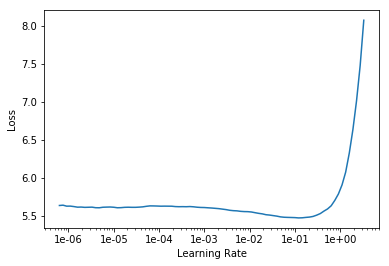

In [0]:
learn.lr_find()
learn.recorder.plot()

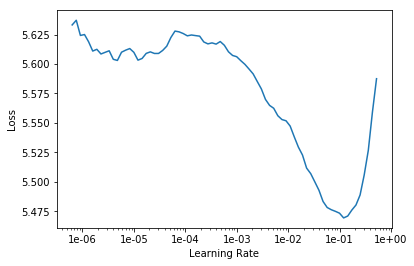

In [0]:
learn.recorder.plot(skip_end=15)

In [0]:
learn.freeze()
learn.fit_one_cycle(2, 1e-2)
learn.save('14train_wiki_lm_head');
learn.freeze_to(-2)
learn.fit_one_cycle(2, 1e-2)
learn.save('14train_wiki_lm_body_1');
learn.freeze_to(-3)
learn.fit_one_cycle(2, 1e-2)
learn.save('14train_wiki_lm_body_2');

epoch,train_loss,valid_loss,accuracy,time
0,4.812951,4.737825,0.286118,07:57
1,4.581126,4.610870,0.292208,08:01


epoch,train_loss,valid_loss,accuracy,time
0,4.617568,4.619370,0.295831,08:07
1,4.394826,4.457231,0.305996,08:07


epoch,train_loss,valid_loss,accuracy,time
0,4.525517,4.576008,0.299064,08:33
1,4.336329,4.389884,0.311796,08:33


In [0]:
learn.unfreeze()
learn.fit_one_cycle(4, 1e-3)
learn.save('14train_wiki_lm_body_3');

epoch,train_loss,valid_loss,accuracy,time
0,4.210037,4.378464,0.312067,08:55
1,4.158617,4.353533,0.313475,08:56
2,4.089429,4.338175,0.314778,08:56
3,3.953777,4.342241,0.314236,08:56


In [0]:
learn.unfreeze()
learn.fit_one_cycle(4, 1e-3)
learn.save('14train_wiki_lm_body_4');

epoch,train_loss,valid_loss,accuracy,time
0,3.989060,4.344840,0.314230,08:55
1,4.044951,4.334935,0.314901,08:55
2,3.926228,4.334010,0.314781,08:55
3,3.845732,4.340808,0.314472,08:54


In [0]:
learn.save_encoder('14train_wiki_lm_enc')

### Classifier

In [0]:
data_clas = TextClasDataBunch.from_csv(subsets, '14train.csv', vocab=data_lm.train_ds.vocab, bs=bs)
data_clas.save('14train_data_clas_wiki.pkl')

In [0]:
data_clas=load_data(subsets,'14train_data_clas_wiki.pkl',bs=bs)

In [0]:
data_clas.show_batch()

text,target
"xxbos তাদের মধ্যে কেউ তাকে খুন করেছে ? ’ ‘ কলকাতার xxunk যাদের নাম আছে তাদের xxunk করলে xxunk আন্দাজ করা xxunk , এবার তিন নম্বর xxunk সঙ্গে দেখা করা যাক । ’ ‘ xxunk । ’ তিন নম্বর ঘরে xxunk সান্যাল xxunk xxunk হয়ে শুয়ে xxunk , xxunk শুনে xxunk তুললেন । xxunk , ‘ কে ? ’ xxunk সংক্ষেপে xxunk , ‘ পুলিস । ’ xxunk উঠে xxunk",shordindu
"xxbos রোহিণী xxunk xxunk । “ এ xxunk xxunk আমার xxunk হইবে না – না xxunk xxunk xxunk । আমি xxunk গেলে , xxunk দেখিতে xxunk না ? আমি xxunk না । এই xxunk আমার স্বর্গ , এখানে xxunk মন্দির । এই xxunk আমার শ্মশান , এখানে আমি xxunk xxunk । শ্মশানে xxunk xxunk না , এমন xxunk আছে । আমি যদি এ xxunk xxunk না যাই , ত আমার",bongkim
"xxbos সহকারে সুন্দরী xxunk , xxunk স্বামীর xxunk , চন্দ্রশেখর ঔষধ xxunk xxunk । ঔষধ xxunk শুভ লগ্ন অবধারিত হইল । ষষ্ঠ পরিচ্ছেদ : xxunk না ? ঔষধ কি , তাহা xxunk পারি না , কিন্তু ইহা সেবন xxunk জন্য , চন্দ্রশেখর xxunk আত্মশুদ্ধি xxunk xxunk । তিনি সহজে xxunk , xxunk শারীরিক xxunk xxunk তিনি বশীভূত xxunk ; কিন্তু xxunk তাহার উপরে কঠোর অনশন - ব্রত আচরণ xxunk xxunk",bongkim
"xxbos দিয়া xxunk — অ্যা - ই xxunk । সঙ্গে সঙ্গে সে তাল xxunk হাতে তালি দিয়া বাজনার বোল xxunk আরম্ভ করিল — xxunk তা - তা - xxunk — তা - তা - xxunk — xxunk - xxunk তা - তা - xxunk — xxunk – ! xxunk সে তাহার নূতন স্বরচিত xxunk xxunk xxunk — ক - য়ে কালী xxunk — খ - য়ে xxunk , গ -",tarashonkor
"xxbos বাজার xxunk সাধ xxunk না - তবে xxunk উপর রাগ ছিল xxunk একবার xxunk দেখিতে xxunk - xxunk প্রথমেই xxunk যে , সেখানে খোদ কমলাকান্ত xxunk নামে xxunk - xxunk পচা xxunk xxunk xxunk xxunk আছে - আপনি ঘোল xxunk , এবং xxunk xxunk । তখন চমক হইল - চক্ষু xxunk - xxunk , xxunk বাবুর xxunk আছি । xxunk xxunk কাছে আছে বটে । প্রসন্ন এক xxunk ঘোল",bongkim


In [0]:
learn_cls = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5, pretrained=False)

In [0]:
learn_cls.load_encoder('14train_wiki_lm_enc')

In [0]:
learn_cls.freeze()

In [0]:
learn_cls.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


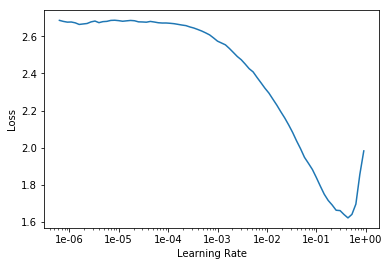

In [0]:
learn_cls.recorder.plot(skip_end=7)

In [0]:
learn_cls.fit_one_cycle(2, 1e-2, moms=(0.8,0.7))
learn_cls.save('14train_wiki_cls_1')
learn_cls.freeze_to(-2)
learn_cls.fit_one_cycle(2 , slice(1e-2/(2.8**4),1e-2), moms=(0.8,0.7))
learn_cls.save('14train_wiki_cls_2')
learn_cls.freeze_to(-3)
learn_cls.fit_one_cycle(2, slice(5e-3/(2.8**4),5e-3), moms=(0.8,0.7))
learn_cls.save('14train_wiki_cls_3')
learn_cls.unfreeze()
learn_cls.fit_one_cycle(4, slice(1e-3/(2.8**4),1e-3), moms=(0.8,0.7))
learn_cls.save('14train_wiki_cls_4')

epoch,train_loss,valid_loss,accuracy,time
0,0.316203,0.086669,0.976213,02:16
1,0.084254,0.049544,0.988582,02:17


epoch,train_loss,valid_loss,accuracy,time
0,0.099730,0.053664,0.991437,02:32
1,0.043026,0.037837,0.995243,02:32


epoch,train_loss,valid_loss,accuracy,time
0,0.030226,0.039008,0.993340,03:38
1,0.013868,0.034779,0.995243,03:37


epoch,train_loss,valid_loss,accuracy,time
0,0.009823,0.035895,0.994291,04:35
1,0.009248,0.037773,0.994291,04:33
2,0.005555,0.036256,0.994291,04:32
3,0.006023,0.035485,0.993340,04:33


#### Testing

In [0]:
pred,targ = testing(subsets/"14test.csv")

1316
Accuracy: 
0.9946808510638298
[('manik_bandhopaddhay', 'shirshendu'), ('tarashonkor', 'manik_bandhopaddhay'), ('shordindu', 'robindronath'), ('shottojit_roy', 'shunil_gongopaddhay'), ('shorotchandra', 'bongkim'), ('robindronath', 'tarashonkor'), ('shomresh', 'toslima_nasrin')]


In [0]:
from sklearn.metrics import f1_score
out  = f1_score(targ, pred, average=None) #'macro' , also == weighted cuz dataset is balanced
out , out.mean()

(array([1.      , 0.994709, 1.      , 0.989362, 1.      , 0.989362, 0.994709, 0.994652, 0.994652, 0.994652, 0.994652,
        0.994709, 0.989362, 0.994709]), 0.9946807650633863)